In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib

In [8]:
df=pd.read_csv("C://New Volume D//CodSoft//Titanic//Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [16]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [17]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [19]:
df['FamilySize'] = df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,2,1
1,2,1,1,0,38.0,1,0,71.2833,0,1
2,3,1,3,0,26.0,0,0,7.9250,2,0
3,4,1,1,0,35.0,1,0,53.1000,2,1
4,5,0,3,1,35.0,0,0,8.0500,2,0


In [22]:
# Display the proportion of passengers who survived or died
# (0 = Died, 1 = Survived)

In [20]:
df[df['FamilySize'] == 0]['Survived'].value_counts(normalize=True)


Survived
0    0.696462
1    0.303538
Name: proportion, dtype: float64

In [21]:
df[df['FamilySize'] > 0]['Survived'].value_counts(normalize=True)


Survived
1    0.50565
0    0.49435
Name: proportion, dtype: float64

In [23]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
##  Random Forest Classifier with Cross-Validation


rf=RandomForestClassifier(random_state=42)
cv_scores=cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:",round(cv_scores.mean()*100, 2), "%")

Random Forest CV Accuracy: 80.82 %


In [32]:
#  Hyperparameter Tuning for Random Forest using Grid Search

param_grid_rf={'n_estimators':[100, 200], 'max_depth': [4, 6, 8]}
grid_rf= GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,cv=5)
grid_rf.fit(X_train, y_train)
best_rf= grid_rf.best_estimator_
rf_preds=best_rf.predict(X_test)

print("Best RF Params: ", grid_rf.best_params_)
print("Random Forest Accuracy: ",accuracy_score(y_test, rf_preds))
print("\n",classification_report(y_test, rf_preds))


Best RF Params:  {'max_depth': 6, 'n_estimators': 100}
Random Forest Accuracy:  0.8044692737430168

               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [38]:
# XGBoost Classifier

xgb_model = XGBClassifier(eval_metric ='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost Accuracy", accuracy_score(y_test, xgb_preds))
print("\n", classification_report(y_test, xgb_preds))

XGBoost Accuracy 0.7877094972067039

               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



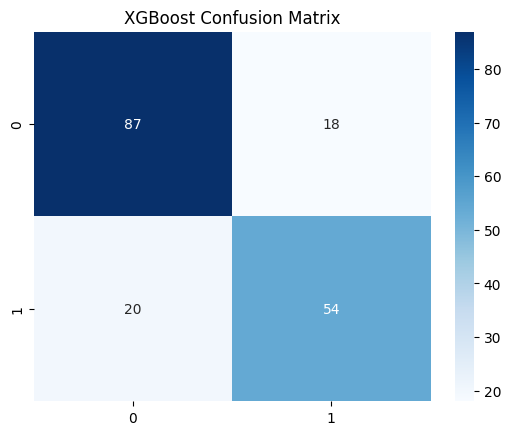

In [39]:
# 📊 Confusion Matrix for XGBoost

sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


Text(0, 0.5, 'Passenger Count')

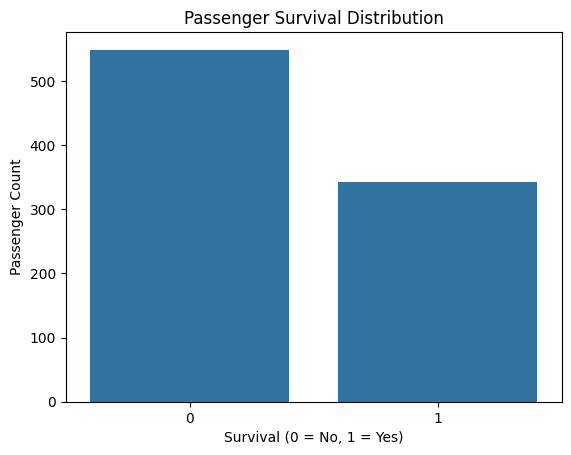

In [42]:
sns.countplot(data=df, x='Survived')
plt.title("Passenger Survival Distribution")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")


Text(0, 0.5, 'Count')

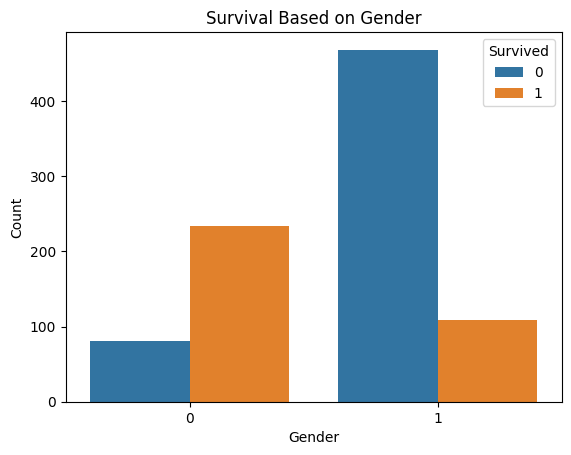

In [44]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

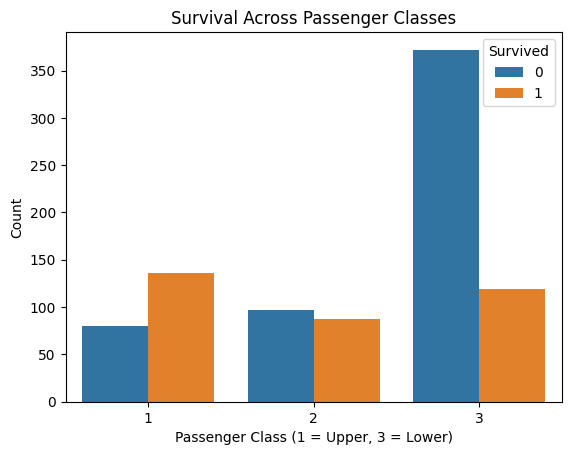

In [46]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Across Passenger Classes")
plt.xlabel("Passenger Class (1 = Upper, 3 = Lower)")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

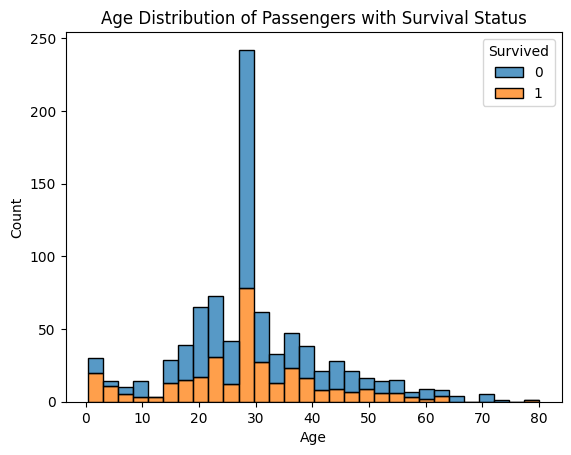

In [48]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title("Age Distribution of Passengers with Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")


Text(0.5, 1.0, 'Correlation Matrix Between Titanic Features')

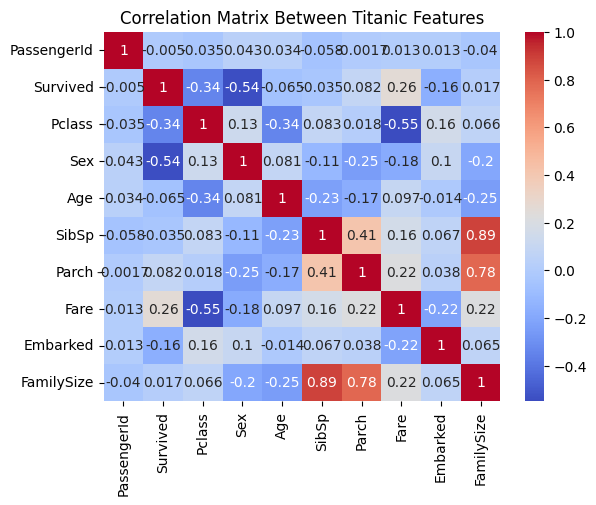

In [50]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Between Titanic Features")


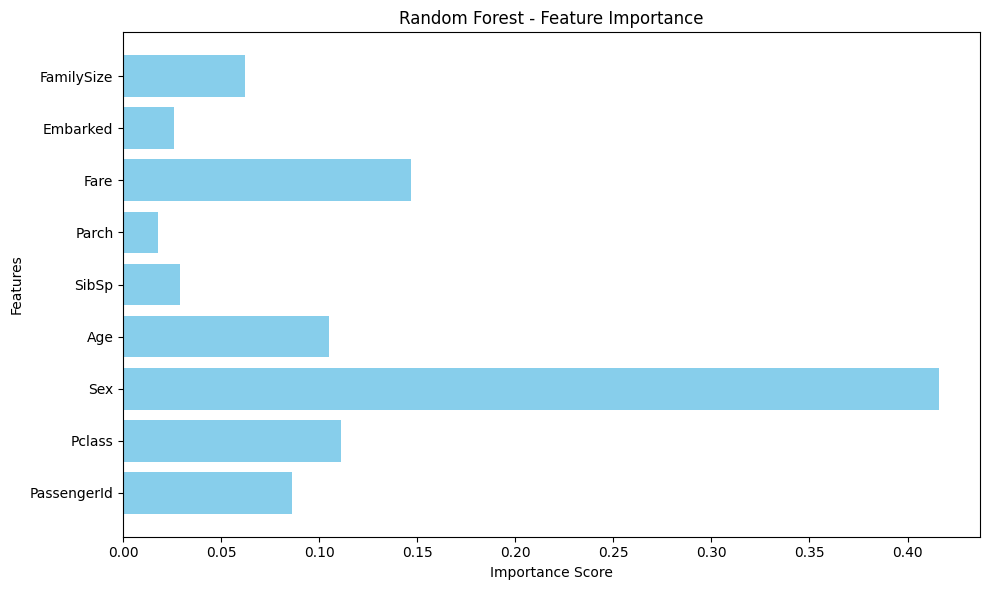

In [55]:
# Random Forest Feature Importance Visualization

rf_importances = best_rf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, rf_importances, color='skyblue')
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

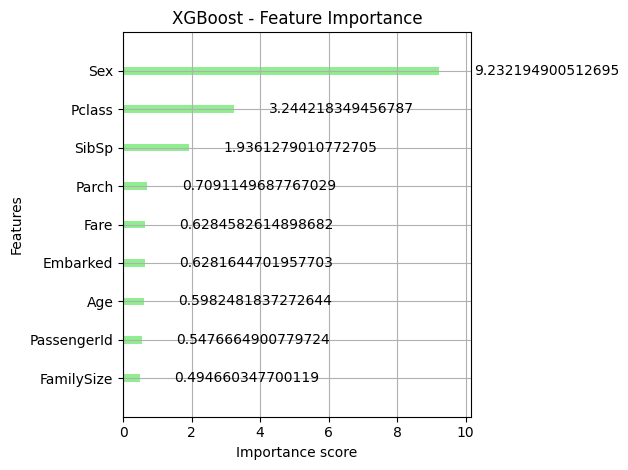

In [54]:
# XGBoost Feature Importance Visualization

from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain', title='XGBoost - Feature Importance', color='lightgreen')
plt.tight_layout()
plt.show()


In [40]:
joblib.dump(xgb_model, "titanic_survival_model.pkl")


['titanic_survival_model.pkl']